# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

# 2) Import Dataset

In [2]:
data = pd.read_csv("weatherAUS.csv")

# 3) Exploratory data analysis

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


# 4) Variable Analysis

## 4.1) Categorical Variable

In [7]:
data.dropna(subset = ["RainTomorrow"], inplace = True)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["RainTomorrow"] = le.fit_transform(data["RainTomorrow"])

In [9]:
data["RainTomorrow"] = data.RainTomorrow.astype("int64")

In [10]:
def categorical(columns):
    plt.figure(figsize = (17,6))
    plt.subplot(1, 2, 1)
    plt.pie(x = data[columns].value_counts(), labels = data[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = data, hue = "RainTomorrow")

### WindGustDir

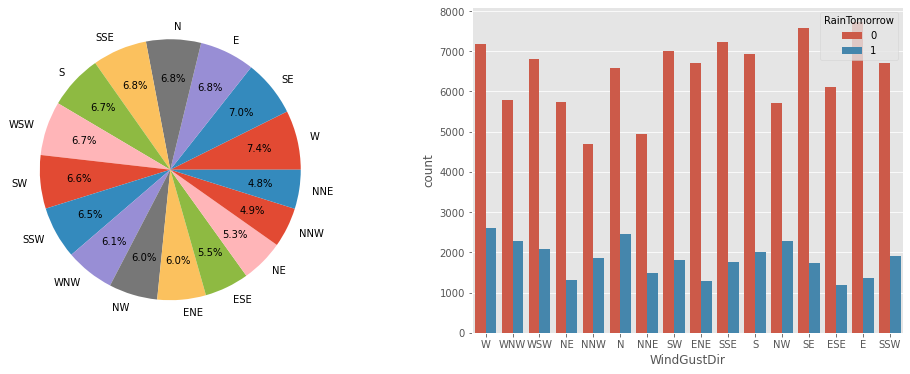

In [11]:
categorical("WindGustDir")

### WindDir9am

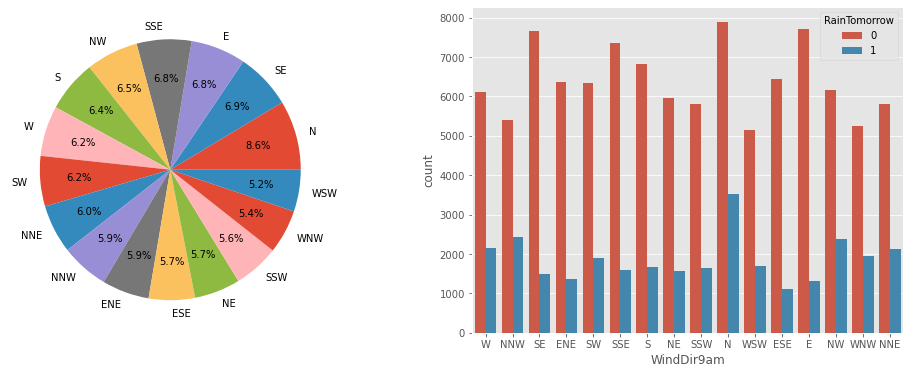

In [12]:
categorical("WindDir9am")

### WindDir3pm

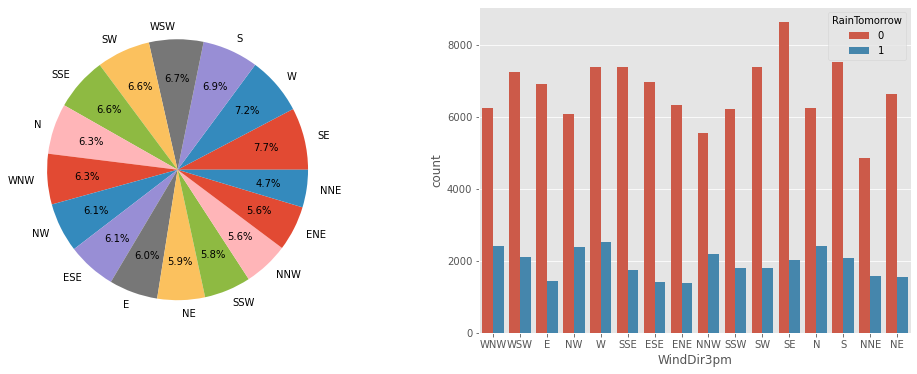

In [13]:
categorical("WindDir3pm")

### RainToday

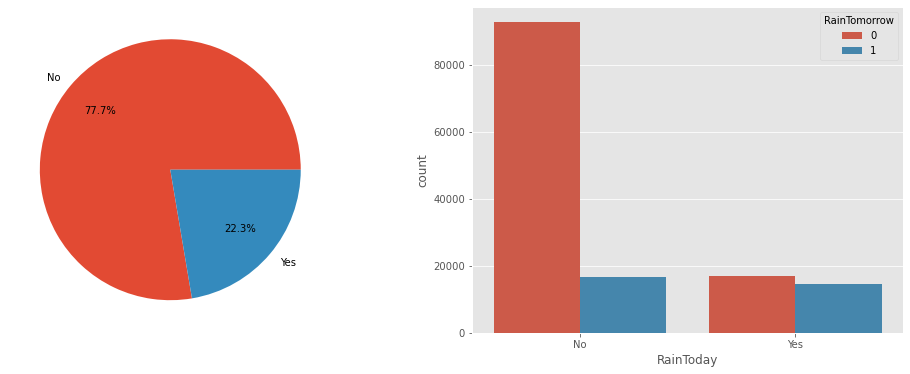

In [14]:
categorical("RainToday")

## 4.2) Numeric Variable

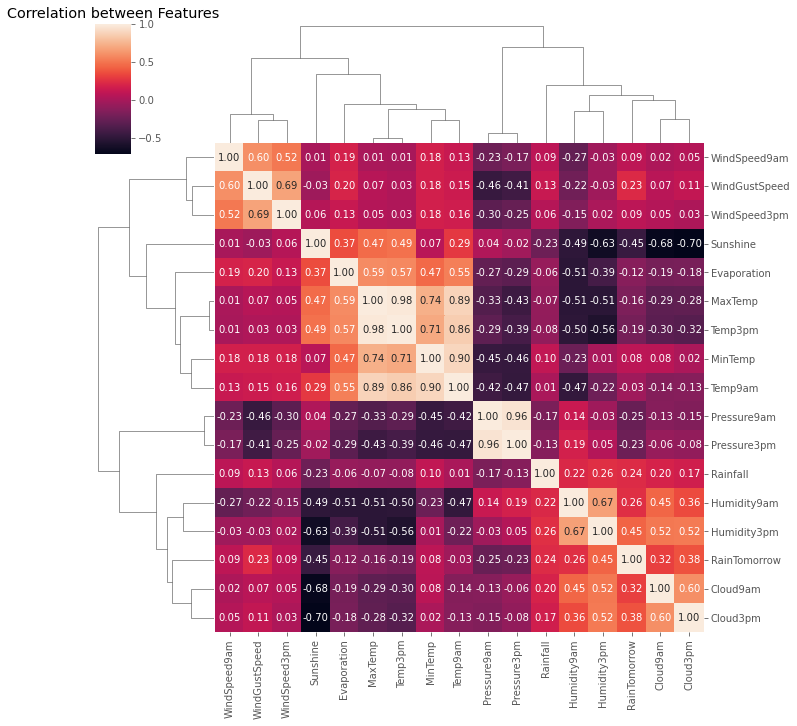

In [15]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between Features")
plt.show()

In [16]:
def numeric(columns, discrete = False):
    if discrete : 
        plt.figure(figsize = (15,7))
        sns.countplot(x = columns, data = data, hue = "RainTomorrow")
        plt.show()
    else :
        plt.figure(figsize = (15,7))
        sns.jointplot(x = columns, y = "RainTomorrow", data = data, kind = "reg")

### Cloud3pm

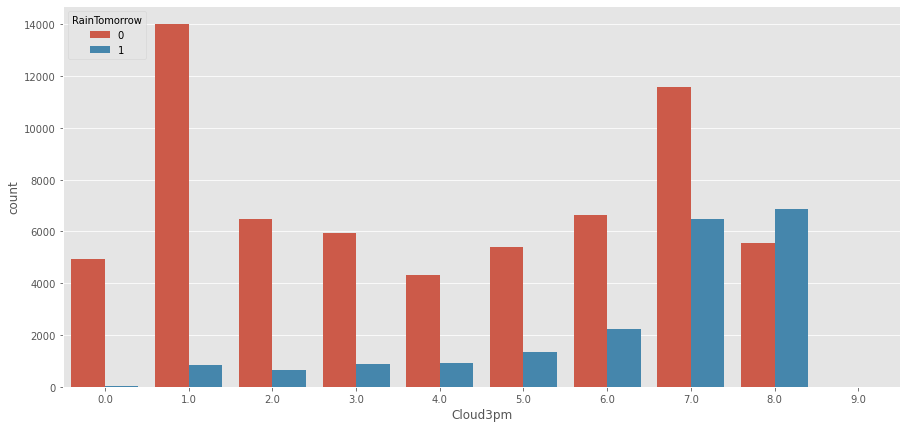

In [17]:
numeric("Cloud3pm", True)

### Cloud9am

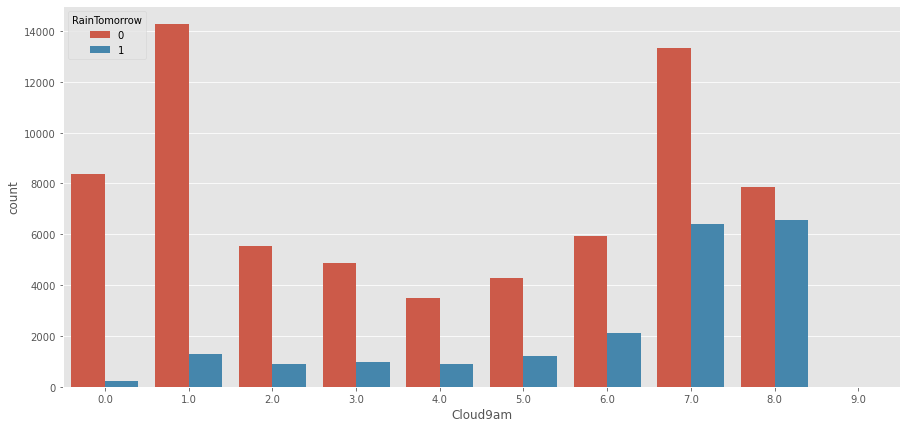

In [18]:
numeric("Cloud9am", True)

### Humidity3pm

<Figure size 1080x504 with 0 Axes>

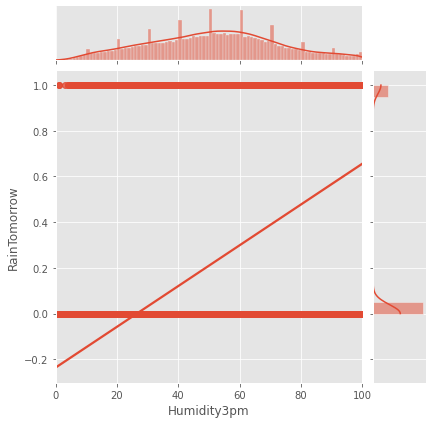

In [19]:
numeric("Humidity3pm")

### Sunshine

<Figure size 1080x504 with 0 Axes>

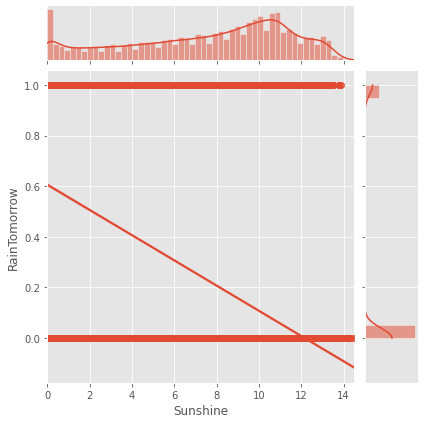

In [20]:
numeric("Sunshine")

### WindGustSpeed

<Figure size 1080x504 with 0 Axes>

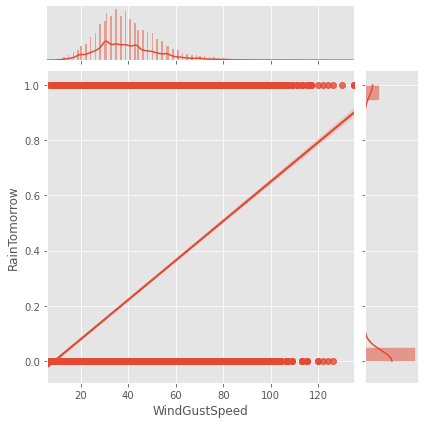

In [21]:
numeric("WindGustSpeed")

### Humidity9am

<Figure size 1080x504 with 0 Axes>

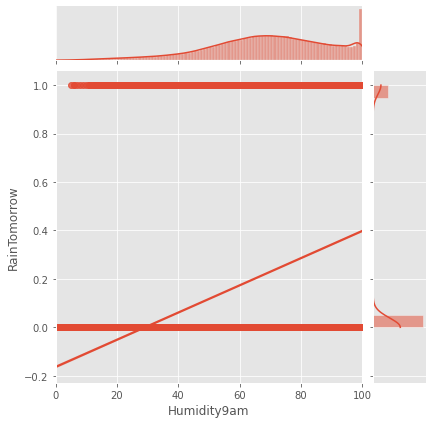

In [22]:
numeric("Humidity9am")

### Pressure9am

<Figure size 1080x504 with 0 Axes>

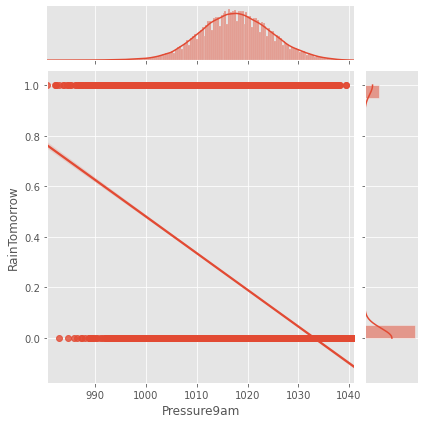

In [23]:
numeric("Pressure9am")

### Pressure3pm

<Figure size 1080x504 with 0 Axes>

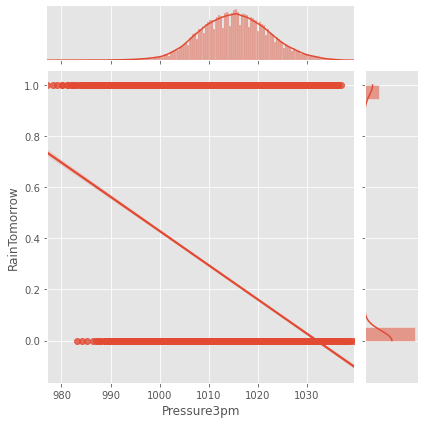

In [24]:
numeric("Pressure3pm")

### Rainfall

<Figure size 1080x504 with 0 Axes>

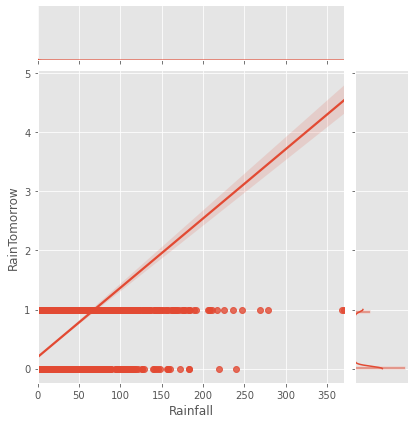

In [25]:
numeric("Rainfall")

# 5) Missing Value

In [26]:
data.isnull().sum().sort_values()

Date                 0
RainTomorrow         0
Location             0
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
RainToday         1406
Rainfall          1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64

### MaxTemp

In [27]:
maxtemp = list(data[data["MaxTemp"].isnull()].index)

In [28]:
data["Date"] = data.Date.astype('datetime64[ns]')

In [29]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [30]:
data.groupby(["month"])["MaxTemp"].mean()

month
1     29.547362
2     28.877704
3     26.886744
4     23.611845
5     20.047202
6     17.324778
7     16.764242
8     18.258930
9     20.772510
10    23.540695
11    26.165571
12    27.526390
Name: MaxTemp, dtype: float64

In [31]:
for i in maxtemp:
    if data["month"][i] == 1:
        data["MaxTemp"][i] = 30
    elif data["month"][i] == 2:
        data["MaxTemp"][i] = 29
    elif data["month"][i] == 3:
        data["MaxTemp"][i] = 27
    elif data["month"][i] == 4:
        data["MaxTemp"][i] = 24
    elif data["month"][i] == 5:
        data["MaxTemp"][i] = 20
    elif data["month"][i] == 6:
        data["MaxTemp"][i] = 17
    elif data["month"][i] == 7:
        data["MaxTemp"][i] = 17
    elif data["month"][i] == 8:
        data["MaxTemp"][i] = 18
    elif data["month"][i] == 9:
        data["MaxTemp"][i] = 21
    elif data["month"][i] == 10:
        data["MaxTemp"][i] = 24
    elif data["month"][i] == 11:
        data["MaxTemp"][i] = 26
    else:
        data["MaxTemp"][i] = 28  

### MinTemp

In [32]:
mintemp = list(data[data["MinTemp"].isnull()].index)

In [33]:
data.groupby(["month"])["MinTemp"].mean()

month
1     17.520778
2     17.500239
3     15.904347
4     12.831979
5      9.618572
6      7.815031
7      6.951308
8      7.465145
9      9.460189
10    11.531145
11    14.299624
12    15.771514
Name: MinTemp, dtype: float64

In [34]:
for i in mintemp:
    if data["month"][i] == 1:
        data["MinTemp"][i] = 18
    elif data["month"][i] == 2:
        data["MinTemp"][i] = 18
    elif data["month"][i] == 3:
        data["MinTemp"][i] = 16
    elif data["month"][i] == 4:
        data["MinTemp"][i] = 13
    elif data["month"][i] == 5:
        data["MinTemp"][i] = 10
    elif data["month"][i] == 6:
        data["MinTemp"][i] = 8
    elif data["month"][i] == 7:
        data["MinTemp"][i] = 7
    elif data["month"][i] == 8:
        data["MinTemp"][i] = 7
    elif data["month"][i] == 9:
        data["MinTemp"][i] = 9
    elif data["month"][i] == 10:
        data["MinTemp"][i] = 12
    elif data["month"][i] == 11:
        data["MinTemp"][i] = 14
    else:
        data["MinTemp"][i] = 16  

### The other categorical variables

In [35]:
list_ = ["WindGustDir", "RainToday", "WindDir3pm", "WindDir9am", "Cloud9am", "Cloud3pm"]

In [36]:
for i in list_:
    data[i].fillna(data[i].mode()[0], inplace = True)

### The other numeric variables

In [37]:
numeric_variable = data.select_dtypes(["int64", "float64"])

In [38]:
for i in numeric_variable.columns:
    data[i].fillna(data[i].mean(), inplace = True)

In [39]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
month            0
dtype: int64

# 6) Outliers Detection

In [40]:
from collections import Counter
def outliers(data,columns):
    aykiri_indexler=[]
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 -Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
        aykiri_gozlemler = data[i][filtre]
        aykiri_index = aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    ortak_indexler = [i for i,v in aykiri_indexler.items() if v>2]
    return ortak_indexler

In [41]:
data.shape

(142193, 24)

In [42]:
x = data.select_dtypes(["float64", "int64"])
delete_index = outliers(data,x.columns)
data = data.drop(delete_index,axis=0).reset_index(drop=True)

In [43]:
data.shape

(127681, 24)

# 7) Feature Engineering

In [44]:
data.drop(["Date", "month", "Location"], axis = 1, inplace = True)

In [45]:
list_ = ["Cloud9am", "Cloud3pm"]

In [46]:
for i in list_:
    data[i] = data[i].astype(str)

In [47]:
data = pd.get_dummies(data)

In [48]:
a = data.columns

In [49]:
list(a)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir3pm_NW',
 'WindDir3pm_S',
 'WindDir3pm_S

In [50]:
data.drop(["RainToday_No"], axis = 1, inplace = True)

# 8) Feature Selection

In [51]:
df = data.copy()

In [52]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm_1.0,Cloud3pm_2.0,Cloud3pm_3.0,Cloud3pm_4.0,Cloud3pm_5.0,Cloud3pm_6.0,Cloud3pm_7.0,Cloud3pm_8.0,Cloud3pm_9.0,RainToday_Yes
0,0.545455,0.503093,0.002500,0.037723,0.525852,0.316239,0.153846,0.289157,0.707071,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393939,0.548454,0.000000,0.037723,0.525852,0.316239,0.030769,0.265060,0.434343,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.532828,0.560825,0.000000,0.037723,0.525852,0.333333,0.146154,0.313253,0.373737,0.30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.439394,0.608247,0.000000,0.037723,0.525852,0.145299,0.084615,0.108434,0.444444,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.648990,0.696907,0.004167,0.037723,0.525852,0.290598,0.053846,0.240964,0.818182,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127676,0.295455,0.480412,0.000000,0.037723,0.525852,0.205128,0.115385,0.156627,0.585859,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127677,0.277778,0.513402,0.000000,0.037723,0.525852,0.205128,0.100000,0.132530,0.505051,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127678,0.297980,0.552577,0.000000,0.037723,0.525852,0.128205,0.100000,0.108434,0.555556,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127679,0.343434,0.585567,0.000000,0.037723,0.525852,0.256410,0.069231,0.108434,0.525253,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
from sklearn.feature_selection import SelectKBest, chi2
x = df.drop(["RainTomorrow"], axis = 1)
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=20)
selector.fit(x, y)
x_new = selector.transform(x)
print(x.columns[selector.get_support(indices=True)]) 

Index(['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'WindGustDir_E',
       'WindDir9am_E', 'WindDir9am_ESE', 'WindDir9am_NNW', 'WindDir3pm_NW',
       'Cloud9am_0.0', 'Cloud9am_1.0', 'Cloud9am_7.0', 'Cloud9am_8.0',
       'Cloud3pm_0.0', 'Cloud3pm_1.0', 'Cloud3pm_2.0', 'Cloud3pm_3.0',
       'Cloud3pm_7.0', 'Cloud3pm_8.0', 'RainToday_Yes'],
      dtype='object')


In [54]:
columns = x.columns[selector.get_support(indices=True)]

# 9) Machine Learning Models

In [55]:
data_new = data[columns]

In [56]:
data_new

,Rainfall,Sunshine,Humidity9am,Humidity3pm,WindGustDir_E,WindDir9am_E,WindDir9am_ESE,WindDir9am_NNW,WindDir3pm_NW,Cloud9am_0.0,Cloud9am_1.0,Cloud9am_7.0,Cloud9am_8.0,Cloud3pm_0.0,Cloud3pm_1.0,Cloud3pm_2.0,Cloud3pm_3.0,Cloud3pm_7.0,Cloud3pm_8.0,RainToday_Yes
0,0.6,7.624853,71.0,22.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.0,7.624853,44.0,25.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,0.0,7.624853,38.0,30.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.0,7.624853,45.0,16.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1.0,7.624853,82.0,33.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127676,0.0,7.624853,59.0,27.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
127677,0.0,7.624853,51.0,24.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
127678,0.0,7.624853,56.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
127679,0.0,7.624853,53.0,24.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [58]:
x = data_new.values
y = data.RainTomorrow.values.reshape(-1,1)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

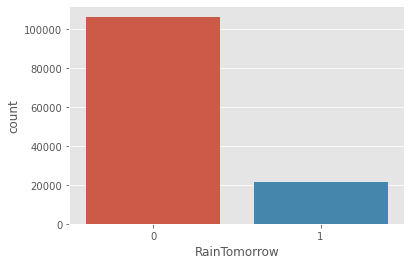

In [59]:
#Let's see weather our dataset is balanced or imbalanced
sns.countplot(data.RainTomorrow)

We can see that our dataset is imbalanced dataset.We are going to use smote technique to deal with our imablanced dataset

In [60]:
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x,y)

<AxesSubplot:ylabel='count'>

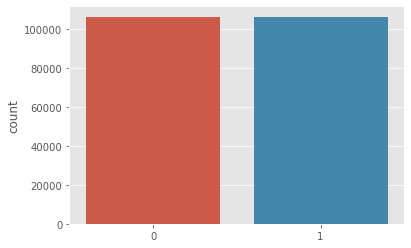

In [61]:
sns.countplot(y_smote)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2 ,random_state = 42)

In [63]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [64]:
# Light GBM classification

In [65]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
model = lgbc.fit(x_train, y_train)

In [66]:
model.score(x_train, y_train)

0.8787761288730657

In [67]:
y_head = model.predict(x_test)

In [71]:
print("Test accuracy :", accuracy_score(y_test, y_head))

Test accuracy : 0.8756638623866146


In [69]:
print(classification_report(y_test, y_head))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     21153
           1       0.92      0.83      0.87     21401

    accuracy                           0.88     42554
   macro avg       0.88      0.88      0.88     42554
weighted avg       0.88      0.88      0.88     42554

